In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# The autocorrelation function:
def r_auto(x,t):
    N=len(x)
    if (t<0) | (t>(N-1)):
        print ('Auto-correlated lag t outside allowed range')
        r_t=np.nan
    else:
        r_t=(np.dot(x[0:N-t],x[t:N]))/(N-t)
    return r_t


The actual freq of the sinusoid is 4 Hz
The rough estimate of the sinusoid is 4.02404623619
The correction to the rough estimate of the freq of the sinusoid is 0.00182166469216
The final estimate of the freq of the sinusoid is 4.02586790088


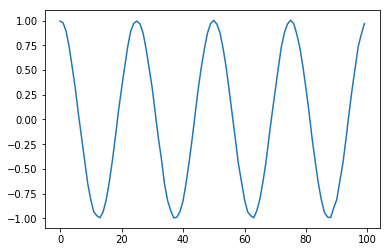

In [3]:
a=1
N=100
f_0=np.random.randint(2,5)
print('The actual freq of the sinusoid is '+str(f_0) + ' Hz')
n_vec=np.linspace(0,1-1/N,N)
noise_vec=0.01*np.random.randn(N)

x=a*np.cos(2*np.pi*f_0*n_vec)+noise_vec

plt.plot(x)

############################################
# Estimate the rough frequency estimate ($w_1$):
############################################
num,den=0,0
l_1=0
l_2=N-3
for n in range(l_1,l_2-2):
    num+= r_auto(x,n+1)*(r_auto(x,n)+r_auto(x,n+2))
    den+=r_auto(x,n+1)**2
w_1=np.arccos(num/(2*den))
f_rough=w_1*N/(2*np.pi)
print('The rough estimate of the sinusoid is '+str(f_rough))

############################################
# Estimate the correction offset to get a finer grained estimate ($\mu$):
############################################
a_00,a_01,d_0,d_1=0,0,0,0
for n in range(l_1,l_2+1):
    a_00+=r_auto(x,n)**2
    a_01+=n*np.sin(w_1*n)*r_auto(x,n)
    d_0+=np.cos(w_1*n)*r_auto(x,n)
    d_1+=n*np.cos(w_1*n)*np.sin(w_1*n)*r_auto(x,n)
a_10=a_01
n_v=np.arange(l_1,l_2+1)
a_11=np.dot(n_v**2,(np.sin(w_1*n_v))**2)
mu_est=(d_1*a_00-d_0*a_10)/(a_11*a_00-a_01*a_10)
print('The correction to the rough estimate of the freq of the sinusoid is '+str(mu_est))
f_fine=f_rough+mu_est
print('The final estimate of the freq of the sinusoid is '+str(f_fine))